---

# 신용정보

In [2]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지 (이 방식이 정확함)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import pandas as pd

df = pd.read_csv('병합된 데이터\\2_신용정보_merged.csv' , encoding='utf-8')
df.columns

Index(['기준년월', 'ID', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액',
       'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV신청일자',
       'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월',
       '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M',
       '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '카드론동의여부',
       '월상환론상향가능한도금액', 'RV전환가능여부', '일시불ONLY전환가능여부', '카드이용한도금액_B1M',
       '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수',
       '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '시장단기연체여부_R3M',
       '시장연체상환여부_R6M', '시장연체상환여부_R3M', 'rv최초시작후경과일'],
      dtype='object')

<선정된 컬럼 19개>
- 기준년월
- ID
- 카드이용한도금액
- RV신청일자
- RV약정청구율
- RV최소결제비율
- 강제한도감액횟수_R12M
- 강제한도감액금액_R12M
- 카드론동의여부
- 카드이용한도금액_B1M
- 카드이용한도금액_B2M
- 연체감액여부_R3M
- 한도심사요청건수
- 한도요청거절건수
- 시장단기연체여부_R6M
- 시장단기연체여부_R3M
- 시장연체상환여부_R6M
- 시장연체상환여부_R3M
- rv최초시작후경과일

In [4]:
# 사용할 19개 컬럼 리스트
selected_cols = [
    '기준년월', 'ID',
    '카드이용한도금액', 'RV신청일자', 'RV약정청구율', 'RV최소결제비율',
    '강제한도감액횟수_R12M', '강제한도감액금액_R12M',
    '카드론동의여부',
    '카드이용한도금액_B1M', '카드이용한도금액_B2M',
    '연체감액여부_R3M',
    '한도심사요청건수', '한도요청거절건수',
    '시장단기연체여부_R6M', '시장단기연체여부_R3M',
    '시장연체상환여부_R6M', '시장연체상환여부_R3M',
    'rv최초시작후경과일'
]

# 컬럼 필터링
df_selected = df[selected_cols]

# ✅ 전체 구조 확인
print("✅ 데이터 크기:", df_selected.shape)
print("\n✅ 컬럼별 타입 및 결측치:")
print(df_selected.info())

✅ 데이터 크기: (2400000, 19)

✅ 컬럼별 타입 및 결측치:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   기준년월           int64  
 1   ID             object 
 2   카드이용한도금액       int64  
 3   RV신청일자         float64
 4   RV약정청구율        float64
 5   RV최소결제비율       float64
 6   강제한도감액횟수_R12M  int64  
 7   강제한도감액금액_R12M  int64  
 8   카드론동의여부        object 
 9   카드이용한도금액_B1M   int64  
 10  카드이용한도금액_B2M   int64  
 11  연체감액여부_R3M     int64  
 12  한도심사요청건수       object 
 13  한도요청거절건수       int64  
 14  시장단기연체여부_R6M   int64  
 15  시장단기연체여부_R3M   int64  
 16  시장연체상환여부_R6M   int64  
 17  시장연체상환여부_R3M   int64  
 18  rv최초시작후경과일     int64  
dtypes: float64(3), int64(13), object(3)
memory usage: 347.9+ MB
None


- 전체 결측치 확인

In [5]:
missing = df_selected.isnull().sum()
print(df_selected.isnull().sum())
print("\n결측치 개수:\n", missing[missing > 0])

기준년월                   0
ID                     0
카드이용한도금액               0
RV신청일자           1951236
RV약정청구율                0
RV최소결제비율               0
강제한도감액횟수_R12M          0
강제한도감액금액_R12M          0
카드론동의여부                0
카드이용한도금액_B1M           0
카드이용한도금액_B2M           0
연체감액여부_R3M             0
한도심사요청건수               0
한도요청거절건수               0
시장단기연체여부_R6M           0
시장단기연체여부_R3M           0
시장연체상환여부_R6M           0
시장연체상환여부_R3M           0
rv최초시작후경과일             0
dtype: int64

결측치 개수:
 RV신청일자    1951236
dtype: int64


- 그룹별 고유값 분포 출력

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# 그룹별 컬럼 딕셔너리
group_dict = {
    "[1] 기본 식별 정보": ["기준년월", "ID"],
    "[2] 카드 이용 한도 관련": ["카드이용한도금액", "카드이용한도금액_B1M", "카드이용한도금액_B2M"],
    "[3] 리볼빙/카드론 사용 성향": ["RV신청일자", "rv최초시작후경과일", "RV약정청구율", "RV최소결제비율", "카드론동의여부"],
    "[4] 강제 한도 감액 관련": ["강제한도감액횟수_R12M", "강제한도감액금액_R12M", "연체감액여부_R3M"],
    "[5] 한도 심사 요청/거절 이력": ["한도심사요청건수", "한도요청거절건수"],
    "[6] 시장 연체 및 상환 여부": ["시장단기연체여부_R6M", "시장단기연체여부_R3M", "시장연체상환여부_R6M", "시장연체상환여부_R3M"]
}

# ✅ 전체 그룹별 고유값 분포 출력
for group_name, columns in group_dict.items():
    print(f"\n\n📂 {group_name}")
    print("-" * (len(group_name) + 6))
    for col in columns:
        if col in df_selected.columns:
            print(f"\n▶ 컬럼명: {col}")
            print(f"   - 고유값 개수: {df_selected[col].nunique(dropna=False)}")
            print(f"   - 고유값 분포:")
            print(df_selected[col].value_counts(dropna=False))
        else:
            print(f"\n⚠️ 컬럼 '{col}'이 DataFrame에 없음")





📂 [1] 기본 식별 정보
------------------

▶ 컬럼명: 기준년월
   - 고유값 개수: 6
   - 고유값 분포:
기준년월
201807    400000
201808    400000
201809    400000
201810    400000
201811    400000
201812    400000
Name: count, dtype: int64

▶ 컬럼명: ID
   - 고유값 개수: 400000
   - 고유값 분포:
ID
TRAIN_000000    6
TRAIN_266650    6
TRAIN_266672    6
TRAIN_266671    6
TRAIN_266670    6
               ..
TRAIN_133331    6
TRAIN_133330    6
TRAIN_133329    6
TRAIN_133328    6
TRAIN_399999    6
Name: count, Length: 400000, dtype: int64


📂 [2] 카드 이용 한도 관련
---------------------

▶ 컬럼명: 카드이용한도금액
   - 고유값 개수: 81852
   - 고유값 분포:
카드이용한도금액
0         98003
9999      37990
10000     37990
9998      33190
10001     32356
          ...  
213480        1
219823        1
16078         1
205989        1
176500        1
Name: count, Length: 81852, dtype: int64

▶ 컬럼명: 카드이용한도금액_B1M
   - 고유값 개수: 91231
   - 고유값 분포:
카드이용한도금액_B1M
0         95756
10000     50643
10001     45667
9999      43129
10002     32947
          ...  
167427        1
151563  

# 📊 컬럼별 고유값 분포 해석 (with 비율)

---

## 📂 [1] 기본 식별 정보

### ▶ 기준년월
- **고유값 수**: 6
- **값 분포:**

| 기준년월 | 개수    | 비율   |
|----------|--------|--------|
| 201807   | 400,000 | 16.7% |
| 201808   | 400,000 | 16.7% |
| 201809   | 400,000 | 16.7% |
| 201810   | 400,000 | 16.7% |
| 201811   | 400,000 | 16.7% |
| 201812   | 400,000 | 16.7% |

✅ **해석**:  
- 모든 ID가 각 월마다 하나씩 존재 → **6개월 시계열 데이터**
- 총 240만 행은 고객 40만 명 × 6개월 구성

---

### ▶ ID
- **고유값 수**: 400,000  
- 각 ID는 6번 반복됨 → 고객별 월별 데이터 존재  
✅ **해석**:  
- 고객 단위 ID이며, 월별 데이터 병합 가능
- 시계열 기반 분석·집계 필요

---

## 📂 [2] 카드 이용 한도 관련 (결제 규모 판단)

### ▶ 카드이용한도금액 / 카드이용한도금액_B1M / 카드이용한도금액_B2M
- 고유값 수: 약 8만~9만 개 (매우 다양)
- `0원` 고객 다수 (약 98,000건 등) → **비활성/사용중지 가능성**
- 9,999~10,001 같은 표준 한도 값 반복됨
- 일부 고객은 20만 원 이상의 한도 보유

✅ **해석**:  
- 고객의 카드 사용 가능 한도를 나타냄  
- 0원은 한도 제한, 이용 불가 상태일 수 있음  
- **결제 규모 판단 지표로 유효**

---

## 📂 [3] 리볼빙/카드론 사용 성향

### ▶ RV신청일자
- NaN: **195만 건 이상 (81%)** → 리볼빙 **미신청 고객 다수**
- 일부는 2016~2018년에 신청

---

### ▶ rv최초시작후경과일
- 99999999: 195만 건 → **리볼빙 비보유자용 플래그 값**
- 나머지는 리볼빙 경과일 (예: 329일, 330일 등)

---

### ▶ RV약정청구율
- 고유값 수: 51,763  
- 대부분 `0.0` (194만 건) → 약정 없음  
- 일부 `99.9998%` → 거의 전체 금액 리볼빙 설정

---

### ▶ RV최소결제비율  
- 고유값 수: 6  
- 값 분포:

| 값       | 개수     | 비율   |
|----------|---------|--------|
| 9.99998  | 1,723,752 | 71.8% |
| 19.99996 | 383,854   | 16.0% |
| 14.99997 | 252,419   | 10.5% |
| 0.00000  | 29,495    | 1.2%  |
| 24.99995 | 10,444    | 0.4%  |
| 29.99994 | 36        | <0.1% |

---

### ▶ 카드론동의여부  
- 고유값 수: 2  
- 값 분포:

| 값 | 개수     | 비율   |
|----|----------|--------|
| Y  | 1,925,770 | 80.2% |
| N  | 474,230   | 19.8% |

✅ **해석**:  
- 전체 고객 중 약 80%가 **카드론 약관 동의** 상태  
- 리볼빙·카드론 상품은 전체 고객의 소수만 적극 이용  
- 미보유자 여부는 중요한 세그먼트 분류 지표

---

## 📂 [4] 강제 한도 감액 관련 (위험 징후)

### ▶ 강제한도감액횟수_R12M  
- 고유값 수: 5  
- 값 분포:

| 감액횟수 | 개수     | 비율   |
|----------|----------|--------|
| 0        | 2,047,670 | 85.3% |
| 1        | 335,845   | 14.0% |
| 4        | 7,296     | 0.3%  |
| 3        | 4,866     | 0.2%  |
| 2        | 4,323     | 0.2%  |

---

### ▶ 강제한도감액금액_R12M  
- 고유값 수: 7  
- 0원 고객: 약 208만 명  
- 나머지는 1~6 등급 감액 기록 존재

---

### ▶ 연체감액여부_R3M  
- 고유값 수: 2  
- 값 분포:

| 값 | 개수     | 비율   |
|----|----------|--------|
| 0  | 2,383,336 | 99.3% |
| 1  | 16,664    | 0.7%  |

✅ **해석**:  
- 약 15%는 한도 감액 경험 있음 → **위험 신호**  
- 최근 3개월 내 감액은 리스크가 더욱 민감한 지표

---

## 📂 [5] 한도 심사 요청/거절 이력 (리스크 판단 지표)

### ▶ 한도심사요청건수  
- 고유값 수: 2  
- 값 분포:

| 값     | 개수     | 비율     |
|--------|----------|----------|
| 0회    | 2,399,913 | 100.0%  |
| 1회이상 | 87        | <0.01% |

---

### ▶ 한도요청거절건수  
- 고유값 수: 2  
- 값 분포:

| 값 | 개수     | 비율     |
|----|----------|----------|
| 0  | 2,399,939 | 100.0%  |
| 1  | 61        | <0.01% |

✅ **해석**:  
- 대부분 요청/거절 경험 없음  
- **예외적으로 심사 요청 또는 거절 경험 있는 고객**은 **별도 관리 타깃**

---

## 📂 [6] 시장 연체 및 상환 여부 (신용위험 판단)

### ▶ 시장단기연체여부_R6M  
| 값 | 개수     | 비율     |
|----|----------|----------|
| 0  | 2,399,949 | 100.0%  |
| 1  | 51        | <0.01% |

---

### ▶ 시장단기연체여부_R3M  
| 값 | 개수     | 비율     |
|----|----------|----------|
| 0  | 2,399,980 | 100.0%  |
| 1  | 20        | <0.01% |

---

### ▶ 시장연체상환여부_R6M  
| 값 | 개수     | 비율     |
|----|----------|----------|
| 0  | 2,399,999 | 100.0%  |
| 1  | 1         | <0.01% |

---

### ▶ 시장연체상환여부_R3M  
| 값 | 개수     | 비율     |
|----|----------|----------|
| 0  | 2,400,000 | 100.0%  |

✅ **해석**:  
- **연체/상환 경험은 극히 소수**  
- 리볼빙/카드론 사용 여부와 함께 고려하면 **신용 리스크 세그먼트 구성에 적합**

---

## ✅ 전체 요약 정리

| 그룹명                     | 주요 특징 요약                                                   |
|--------------------------|------------------------------------------------------------------|
| [1] 기본 식별 정보        | 6개월 시계열 구조 / 고객 단위 ID 존재                             |
| [2] 결제 규모             | 0원 고객 다수 (비활성 가능), 10만 원 이하 한도 사용자 비중 높음       |
| [3] 리볼빙/카드론 성향    | 대부분 미사용, 일부만 약정 설정 및 동의 → 고수익 or 리스크 지표       |
| [4] 감액 관련             | 약 15%가 감액 경험 → 카드사에서 신용도 하락 판단 이력 있음            |
| [5] 심사 요청/거절 이력   | 극히 일부 고객만 해당 → 희귀 정보지만 리스크 타깃 후보로 중요           |
| [6] 시장 연체 및 상환 여부 | 전체 고객 중 연체/상환 이력은 매우 희귀 → 해당 고객만 집중 모니터링 필요  |


- [2] 카드 이용 한도 관련

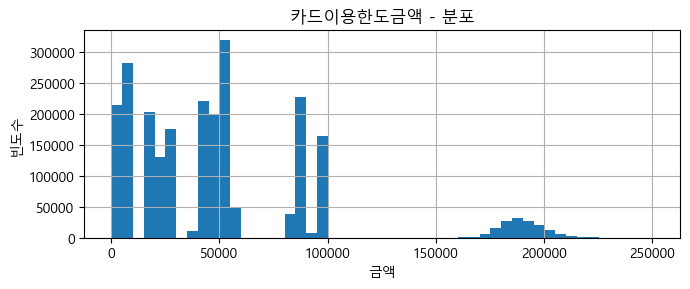

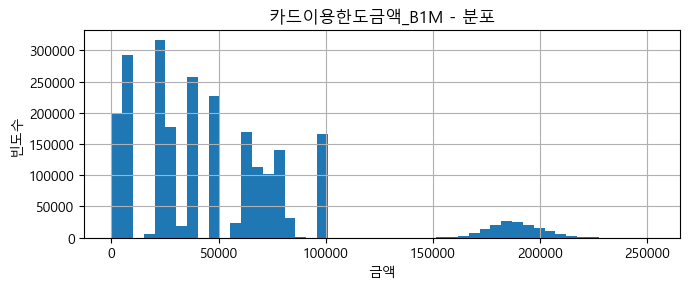

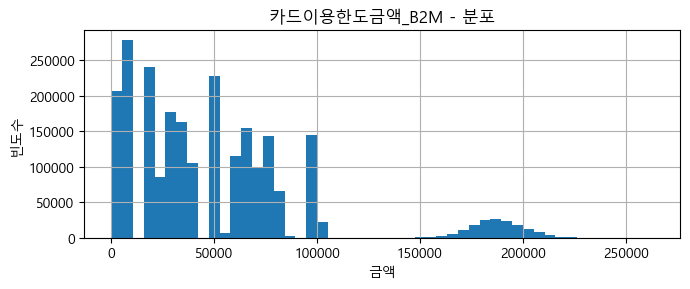

In [24]:
def plot_group_2(df):
    cols = ['카드이용한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M']
    for col in cols:
        df[col].dropna().plot(kind='hist', bins=50, title=f"{col} - 분포", figsize=(7, 3))
        plt.xlabel("금액")
        plt.ylabel("빈도수")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_group_2(df_selected)

-  [3] 리볼빙/카드론 사용 성향
##### 📊 컬럼별 시각화 가이드

| 컬럼명             | 데이터 타입                    | 시각화 방법 설명                                      |
|------------------|----------------------------|--------------------------------------------------|
| `RV신청일자`       | 날짜 문자열 (float 형 숫자)     | 👉 연도/월로 변환 후 `bar plot` 시각화               |
| `rv최초시작후경과일` | 수치형 (이상치 포함)            | 👉 `99999999` 제거 후 `histogram` 시각화             |
| `RV약정청구율`     | 대부분 0, 일부 수치 있음         | 👉 `0` 제외 후 `histogram` 시각화                   |
| `RV최소결제비율`   | 범주형 (총 6개 값)              | 👉 각 비율별 빈도를 `bar plot`으로 시각화            |
| `카드론동의여부`   | 범주형 (`Y/N`)                | 👉 `Y` / `N` 비율을 `bar plot`으로 시각화            |


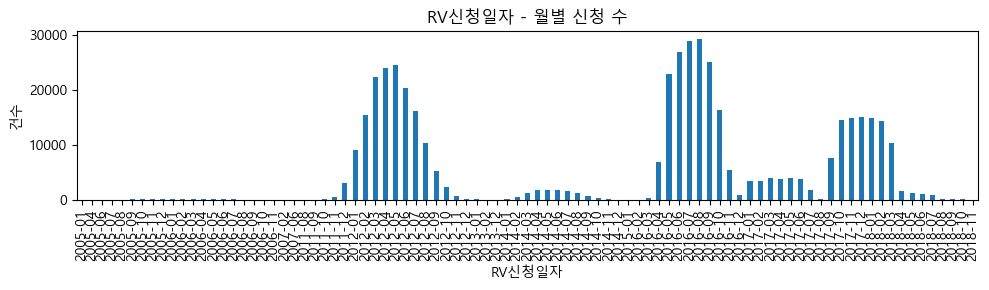

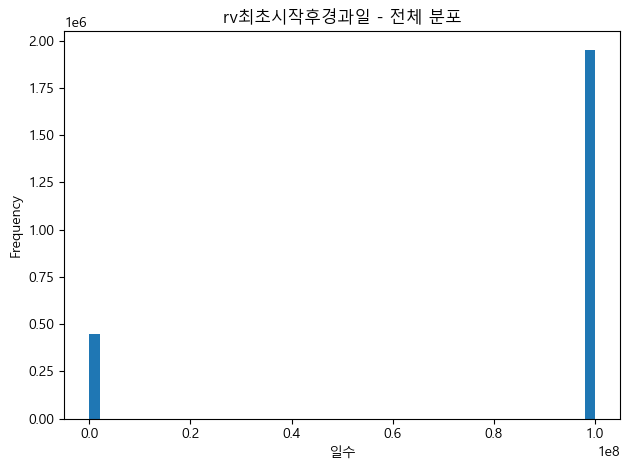

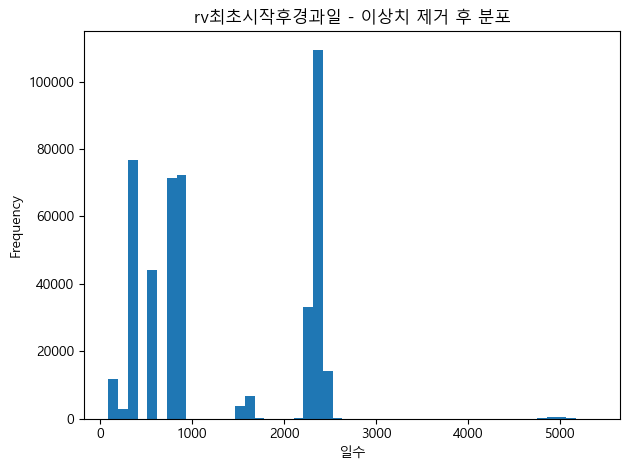

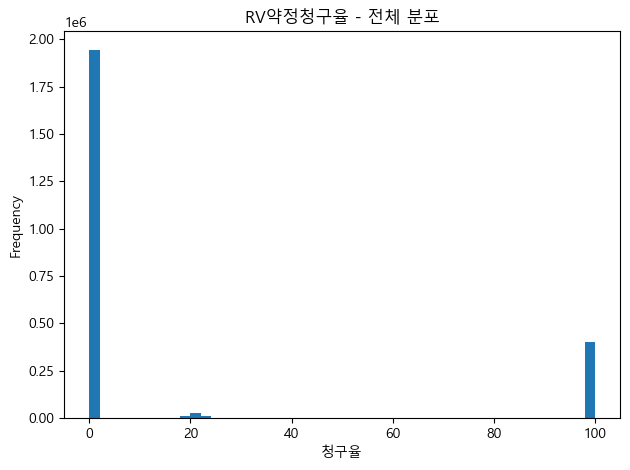

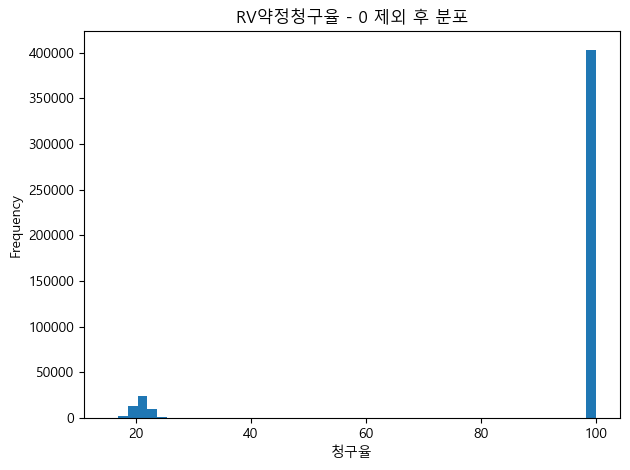

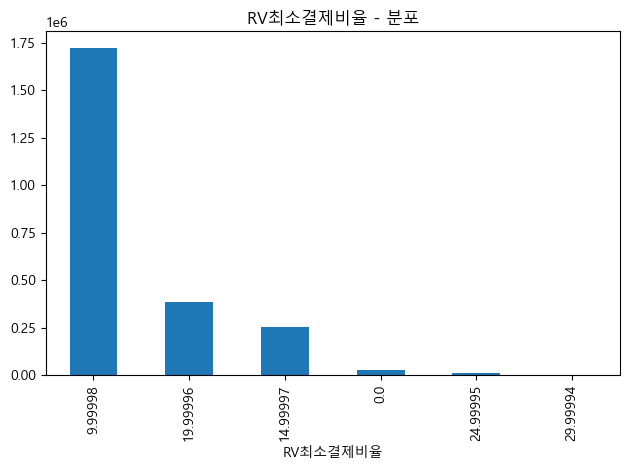

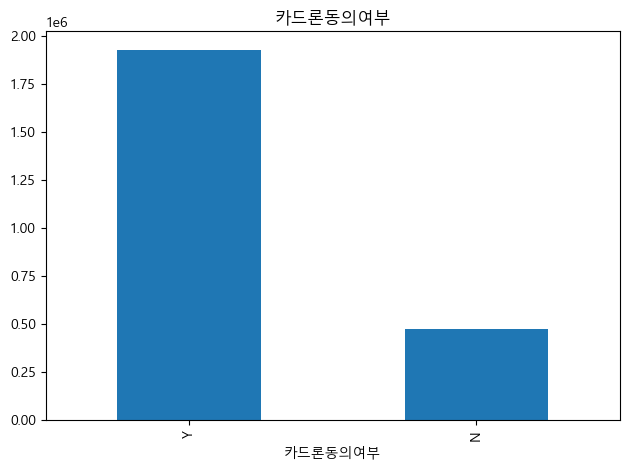

In [28]:
def plot_group_3(df):
    import matplotlib.dates as mdates

    # ✅ RV신청일자
    rv_date = pd.to_datetime(df['RV신청일자'].dropna().astype(int).astype(str), format="%Y%m%d", errors='coerce')
    rv_month = rv_date.dt.to_period("M").value_counts().sort_index()
    rv_month.plot(kind="bar", figsize=(10, 3), title="RV신청일자 - 월별 신청 수")
    plt.ylabel("건수")
    plt.tight_layout()
    plt.show()

    # ✅ rv최초시작후경과일 - 전체
    df['rv최초시작후경과일'].dropna().plot(kind='hist', bins=50, title='rv최초시작후경과일 - 전체 분포')
    plt.xlabel("일수")
    plt.tight_layout()
    plt.show()

    # ✅ rv최초시작후경과일 - 이상치(99999999) 제거
    filtered = df[df['rv최초시작후경과일'] != 99999999]
    filtered['rv최초시작후경과일'].dropna().plot(kind='hist', bins=50, title='rv최초시작후경과일 - 이상치 제거 후 분포')
    plt.xlabel("일수")
    plt.tight_layout()
    plt.show()

    # ✅ RV약정청구율 - 전체
    df['RV약정청구율'].dropna().plot(kind='hist', bins=50, title='RV약정청구율 - 전체 분포')
    plt.xlabel("청구율")
    plt.tight_layout()
    plt.show()

    # ✅ RV약정청구율 - 0 이상만
    df[df['RV약정청구율'] > 0]['RV약정청구율'].plot(kind='hist', bins=50, title='RV약정청구율 - 0 제외 후 분포')
    plt.xlabel("청구율")
    plt.tight_layout()
    plt.show()

    # ✅ RV최소결제비율
    df['RV최소결제비율'].value_counts().plot(kind='bar', title='RV최소결제비율 - 분포')
    plt.tight_layout()
    plt.show()

    # ✅ 카드론동의여부
    df['카드론동의여부'].value_counts().plot(kind='bar', title='카드론동의여부')
    plt.tight_layout()
    plt.show()
    
plot_group_3(df_selected)

- [4] 강제 한도 감액 관련

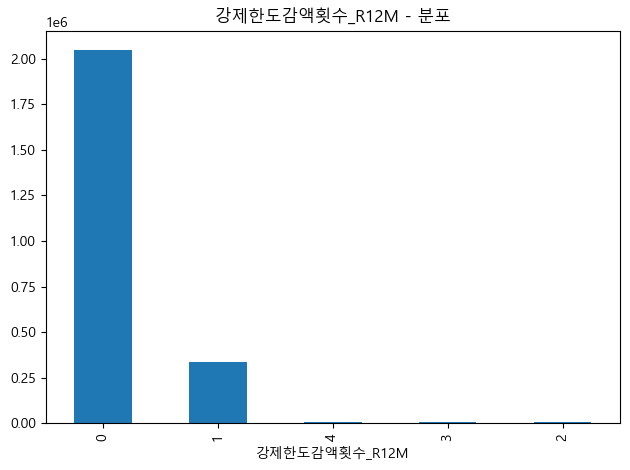

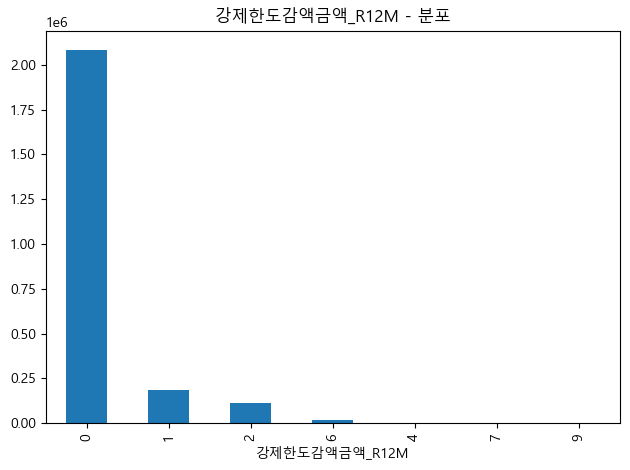

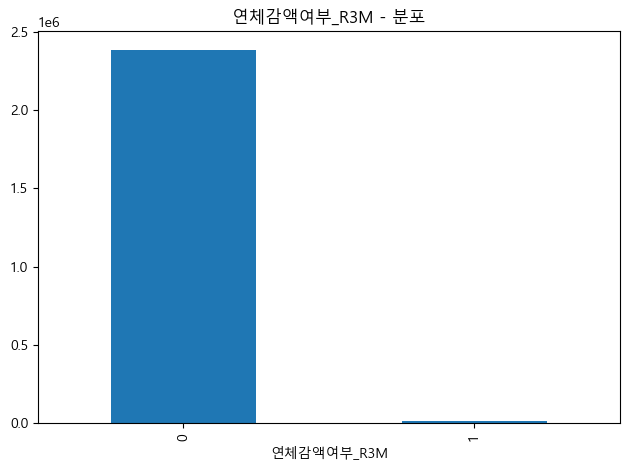

In [25]:
def plot_group_4(df):
    cols = ['강제한도감액횟수_R12M', '강제한도감액금액_R12M', '연체감액여부_R3M']
    for col in cols:
        df[col].value_counts().plot(kind='bar', title=f"{col} - 분포")
        plt.tight_layout()
        plt.show()
plot_group_4(df_selected)

- [5] 한도 심사 요청/거절 이력

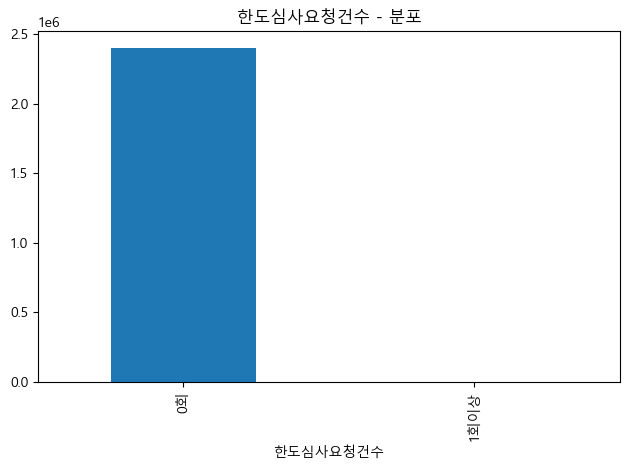

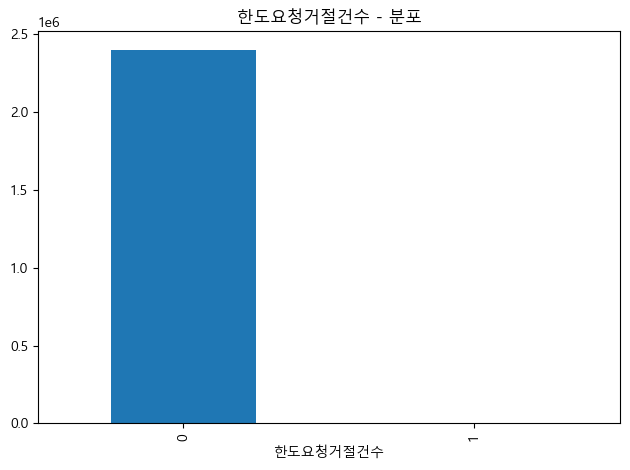

In [26]:
def plot_group_5(df):
    cols = ['한도심사요청건수', '한도요청거절건수']
    for col in cols:
        df[col].value_counts().plot(kind='bar', title=f"{col} - 분포")
        plt.tight_layout()
        plt.show()
plot_group_5(df_selected)

- [6] 시장 연체 및 상환 여부

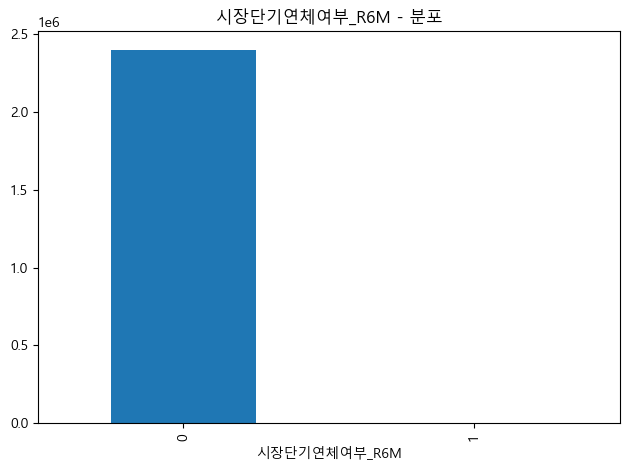

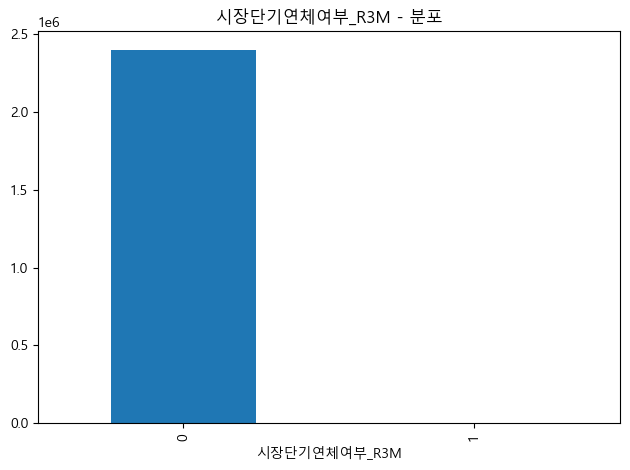

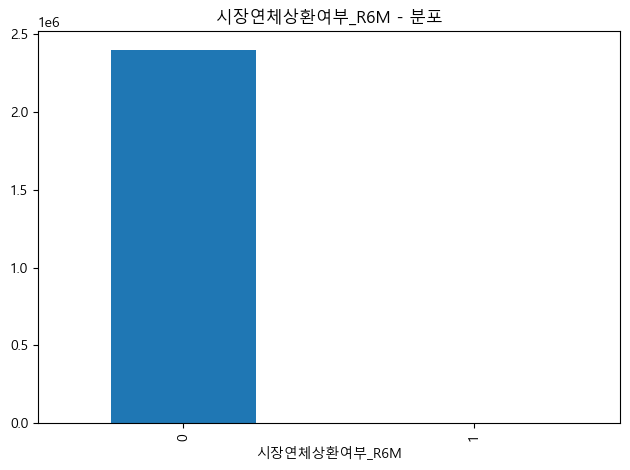

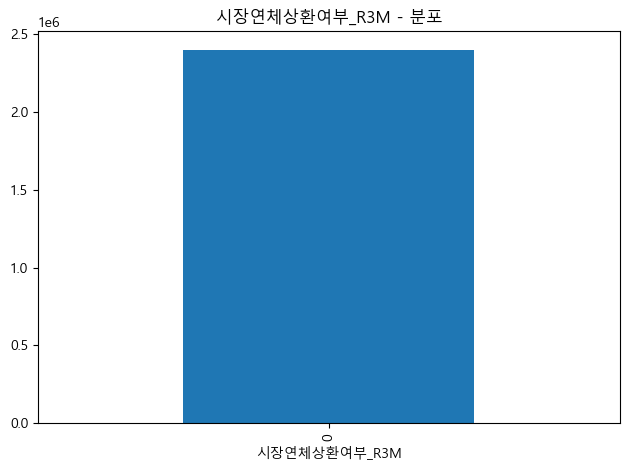

In [27]:
def plot_group_6(df):
    cols = ['시장단기연체여부_R6M', '시장단기연체여부_R3M', '시장연체상환여부_R6M', '시장연체상환여부_R3M']
    for col in cols:
        df[col].value_counts().plot(kind='bar', title=f"{col} - 분포")
        plt.tight_layout()
        plt.show()
plot_group_6(df_selected)

In [29]:
# ✅ "여부"가 들어간 컬럼들의 고유값별 개수 출력
print("\n✅ '여부' 컬럼별 고유값 분포:")
for col in df_selected.columns:
    if '여부' in col:
        print(f"\n▶ {col} 값 분포:")
        print(df_selected[col].value_counts(dropna=False))


✅ '여부' 컬럼별 고유값 분포:

▶ 카드론동의여부 값 분포:
카드론동의여부
Y    1925770
N     474230
Name: count, dtype: int64

▶ 연체감액여부_R3M 값 분포:
연체감액여부_R3M
0    2383336
1      16664
Name: count, dtype: int64

▶ 시장단기연체여부_R6M 값 분포:
시장단기연체여부_R6M
0    2399949
1         51
Name: count, dtype: int64

▶ 시장단기연체여부_R3M 값 분포:
시장단기연체여부_R3M
0    2399980
1         20
Name: count, dtype: int64

▶ 시장연체상환여부_R6M 값 분포:
시장연체상환여부_R6M
0    2399999
1          1
Name: count, dtype: int64

▶ 시장연체상환여부_R3M 값 분포:
시장연체상환여부_R3M
0    2400000
Name: count, dtype: int64


### ✅ '여부' 컬럼별 고유값 분포 및 해석
---
#### ▶ 카드론동의여부
- `Y`: 1,925,770 (80%)
- `N`: 474,230 (20%)

**해석**:
- 전체 고객 중 약 80%가 카드론 동의 상태
- 카드론 활용 여부를 기반으로 한 **이용 패턴 세그먼트 구분**에 유용
- 이진 변수 → `Y/N` → `1/0` 변환 가능

---
#### ▶ 연체감액여부_R3M
- `0`: 2,383,336  
- `1`: 16,664 (약 0.7%)

**해석**:
- 최근 3개월 내 연체로 인한 감액 경험 고객은 매우 적음
- **신용 위험 High 여부 판단**의 보조 지표로 활용 가능
- **불균형 데이터** 주의

---
#### ▶ 시장단기연체여부_R6M
- `0`: 2,399,949  
- `1`: 51 (약 0.0021%)
#### ▶ 시장단기연체여부_R3M
- `0`: 2,399,980  
- `1`: 20 (약 0.0008%)
**해석**:
- 단기 연체 경험이 있는 고객은 극소수
- 해당 컬럼은 **신용 위험 High 판별용**이나, **모델링 시 불균형 처리 필수**
- 클래스 불균형이 심해 SMOTE, 가중치 조정 등 필요 가능성 있음

---
#### ▶ 시장연체상환여부_R6M
- `0`: 2,399,999  
- `1`: 1
#### ▶ 시장연체상환여부_R3M
- `0`: 2,400,000
**해석**:
- 상환까지 완료한 연체 사례는 거의 없음
- `시장연체상환여부_R3M`은 **완전한 zero-variance 변수** → **제거 권장**
- `R6M`도 분포상 거의 영향 없으나, 보조 지표로 유지 가능
---
### 📌 요약 정리

| 항목 | 해석 | 분석 시 고려사항 |
|------|------|------------------|
| 연체 관련 컬럼 | 대부분 0 → 연체 없는 고객 위주 | **극심한 불균형 → 리샘플링 또는 가중치 필요** |
| 카드론동의여부 | 80%가 동의 (`Y`) | **카드론 이용 세그먼트 구분에 유용** |
| 시장연체상환여부_R3M | 전부 0 | **정보 없음 → 제거 추천** |

In [30]:
# 제거할 컬럼 리스트
cols_to_drop = ["시장연체상환여부_R6M", "시장연체상환여부_R3M"]

# 새로운 DataFrame 생성
df_completed = df_selected.drop(columns=cols_to_drop)

# 결과 확인
print(df_completed.shape)
print(df_completed.columns)

(2400000, 17)
Index(['기준년월', 'ID', '카드이용한도금액', 'RV신청일자', 'RV약정청구율', 'RV최소결제비율',
       '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '카드론동의여부', '카드이용한도금액_B1M',
       '카드이용한도금액_B2M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수', '시장단기연체여부_R6M',
       '시장단기연체여부_R3M', 'rv최초시작후경과일'],
      dtype='object')


# 이상치(Outlier) 또는 특수값이 의심되는 컬럼 정리

## 1. 리볼빙 관련 컬럼

### 1) `rv최초시작후경과일`
- **99999999**로 표기된 값이 약 1,951,643건(전체의 대다수)  
  - 보통 “리볼빙 사용 안 함” 또는 “값 없음(결측)”을 의미하는 **특수 코드**로 추정  
  - 실제 경과 일수로 보기 어려워서, **결측 대체**나 **별도 범주** 처리가 필요할 수 있음

### 2) `RV약정청구율`
- `0.000000`(약 1,945,051건)와 `99.999800`(약 403,072건)에 값이 집중  
  - `0`은 “리볼빙 미사용”, `99.9998`은 “최대(거의 전액) 리볼빙”으로 보이는 **극단값**  
  - 나머지 중간 값들도 존재하지만 건수가 매우 적음 → 분포가 한쪽으로 몰려 있으므로 주의  
  - 분석 시 `0`과 `99.9998`을 **특수 범주** 또는 **구간화**로 처리하는 방안 고려

## 2. 카드 이용한도 관련 컬럼

### 1) `카드이용한도금액`, `카드이용한도금액_B1M`, `카드이용한도금액_B2M`
- **0원**이 수만 건 존재(약 9만~9.8만 건)
  - 실제로 한도가 **0원**인 경우도 가능하나, **결측/특수 코드**로 쓰였을 가능성도 있으므로 도메인 검토 필요
- **9,998 / 9,999 / 10,000** 근처에 값이 몰려 있음
  - 시스템이 특정 **기본값(default)** 으로 할당했을 가능성
- 일부 최고값(예: **213480**, **219823** 등)은 1건씩만 존재 → **희귀값** 검토
- 분석 목적(예: 군집화, 예측 모델)에 따라  
  - **이상치 제거**  
  - **결측 대체**  
  - **구간화**  
  - **별도 범주 처리** 등을 고려

## 3. 그 외 컬럼

### 1) `RV신청일자`
- `NaN`이 무려 1,951,236건 이상
  - “리볼빙 미신청” 또는 “데이터 누락” 등 **특수 의미**로 해석 가능  
  - 분석 시 **결측 처리** 혹은 **‘미신청’ 범주** 지정

### 2) `시장연체상환여부_R6M`
- `1`이 단 **1건**뿐 (전체 약 240만 건 중 1건)
  - 극도로 희박 → 통계/모델 관점에서 유의미한 변별력 어려움  
  - 제거 또는 별도 처리 여부 검토

### 3) `시장연체상환여부_R3M`
- **전수 0**(값이 전혀 변동되지 않음)
  - 분류/회귀 모델 입력 시 **변수가치가 동일**하므로, **예측력 없음**  
  - 사실상 사용 가치가 떨어짐

---

> **Note**: “이상치 제거”가 항상 정답은 아니며, 도메인 로직과 분석 목적에 따라  
> - **결측값 대체**  
> - **특수 코드로 별도 구분**  
> - **구간화**  
> 등의 방식으로 전처리하는 경우가 많습니다.
